# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
import numpy as np
def f(x):
    return (x*x)*np.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*np.sin(x)+(2-x*x)*np.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N % 2==1:
        N=N+1
    dx = (xmax-xmin)/np.int(N)
    x = np.linspace(xmin,xmax,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


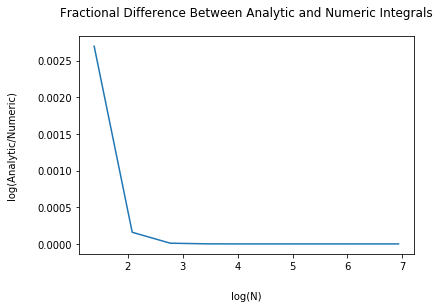

In [13]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]# Panel numbers to use
N1=4
N2=8
N3=16
N4=32
N5=64
N6=128
N7=256
N8=512
N9=1024
xvalues = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
result_analytic = integrate_analytic(x0, x1)
y1 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N1)
y2 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N2)
y3 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N3)
y4 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N4)
y5 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N5)
y6 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N6)
y7 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N7)
y8 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N8)
y9 = integrate_analytic(x0, x1)/integrate_numeric(x0, x1, N9)
yvalues = [y1,y2,y3,y4,y5,y6,y7,y8,y9]
plt.ylabel("log(Analytic/Numeric)", size=10, labelpad=20)
plt.xlabel("log(N)", size=10, labelpad=20)
plt.title("Fractional Difference Between Analytic and Numeric Integrals", pad=20)
plt.plot(np.log(xvalues),np.log(yvalues))

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The accuracy of the numerical method increases, and the fractional difference becauses asymptotic to zero. The error of the Simpson method is inversely proportional to N to some power. If the number of panels is taken too large then the program can no longer safely use the number as an integer and the formula fails - a high order approximation is not required for a low order function.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The panel count affects accuracy around a factor N^2 less than the Simspon rule, the increased number of panels would however continue to decrease the error up to high orders of N.